C:\Users\dsmat\AppData\Local\Temp\ipykernel_21076\3886191645.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


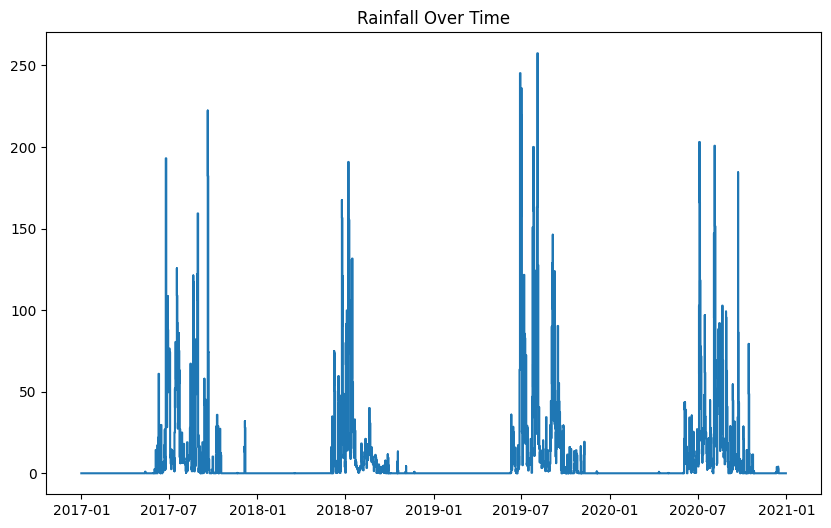

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('combined_rainfall_data.csv')

# Convert date column to datetime (assuming it has a 'Date' column)
df['TIME'] = pd.to_datetime(df['TIME'], format='%Y-%m-%d')

# Set the date as the index
df.set_index('TIME', inplace=True)

# Fill missing values (if any)
df.fillna(method='ffill', inplace=True)

# Plot the rainfall data to visualize
plt.figure(figsize=(10,6))
plt.plot(df['RAINFALL'])  # Replace 'Rainfall' with the actual column name
plt.title('Rainfall Over Time')
plt.show()


In [6]:
# Function to create sequences of data
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['RAINFALL']])  # Replace 'Rainfall' with the actual column

# Sequence length (e.g., 30 days)
SEQ_LENGTH = 30
X, y = create_sequences(df_scaled, SEQ_LENGTH)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


Epoch 1/20


d:\FloodAihackthon\.venvv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: nan - val_loss: nan
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: nan - val_loss: nan
Epoch 3/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: nan - val_loss: nan
Epoch 4/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: nan - val_loss: nan
Epoch 5/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: nan - val_loss: nan
Epoch 6/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: nan - val_loss: nan
Epoch 7/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: nan - val_loss: nan
Epoch 8/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: nan - val_loss: nan
Epoch 9/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: nan - val_loss: nan
Epoch 10/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: nan - val_loss: nan
Epoch 11/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: nan - val_loss: nan
Epoch 12/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: nan - val_loss: nan
Epoch 13/20
146/146 ━━━━━━━━━━━━━━━━

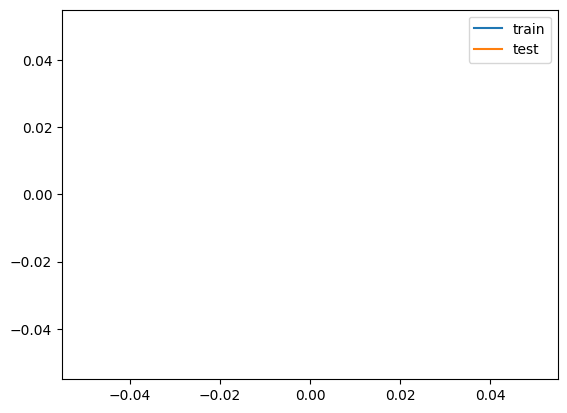

In [7]:
# Define the LSTM model
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(64))
model.add(Dropout(0.2))

model.add(Dense(1))  # Predicting one value (rainfall)

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot training loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


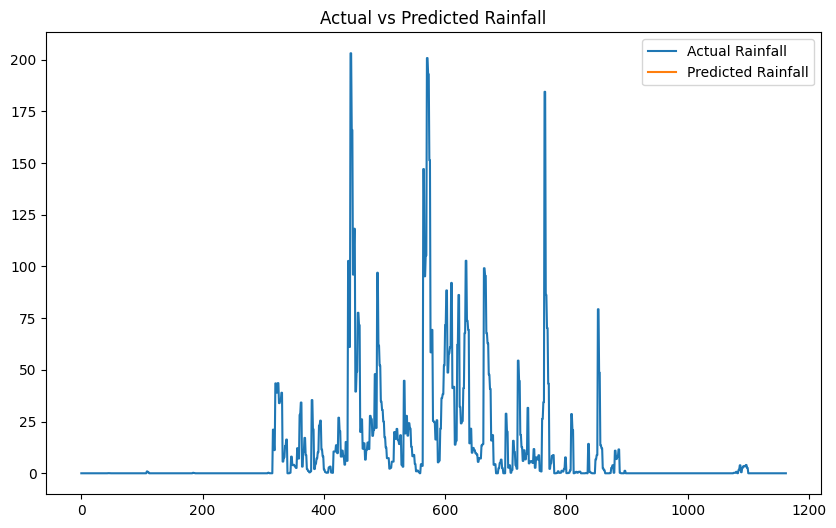

In [8]:

# Make predictions on the test set
predictions = model.predict(X_test)

# Inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Rainfall')
plt.plot(predictions, label='Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()
